In [1]:
!pip install numpy

In [2]:
import numpy as np

In [3]:
!pip install pandas

In [4]:
import pandas as pd

In [5]:
!pip install matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
!pip install seaborn

In [8]:
import seaborn as sns

In [9]:
!pip install scikit-learn

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Load Dataset

In [13]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# EDA

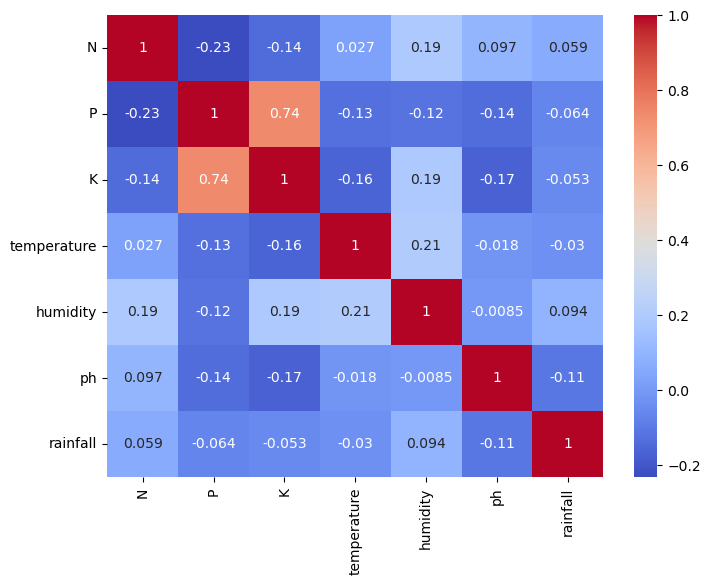

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['N','P','K','temperature','humidity','ph','rainfall']].corr(), annot=True, cmap="coolwarm")
plt.show()

C:\Users\anish\AppData\Local\Temp\ipykernel_27584\1047093309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'])


<Axes: xlabel='N', ylabel='Density'>

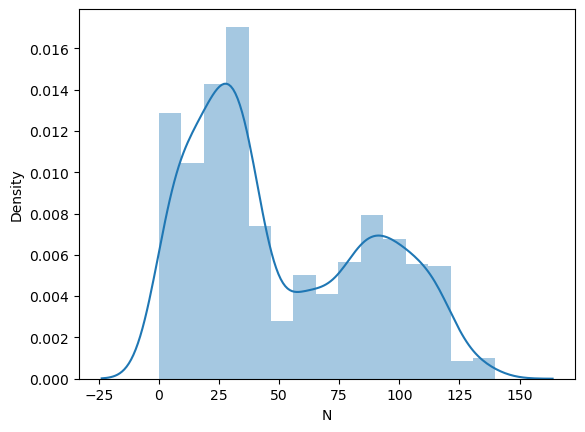

In [16]:
sns.distplot(df['N'])

# Encoding

In [17]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


# Scaling: Normalization

In [18]:
# Select numeric columns to normalize
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']

# Initialize scaler
scaler = MinMaxScaler()

# Fit-transform the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,20
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,20
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,20
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,20
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,20


# Train Test Split

In [19]:
X = df.drop('label',axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training, Testing Multiple Classifiers

In [20]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}


# Train and evaluate each model
for name, model in models.items():
    print("="*50)
    print("Model:", name)
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        18
           2       0.89      0.94      0.91        17
           3       1.00      1.00      1.00        23
           4       0.91      1.00      0.95        21
           5       0.96      1.00      0.98        22
           6       0.83      1.00      0.91        15
           7       1.00      1.00      1.00        24
           8       0.78      0.74      0.76        19
           9       1.00      1.00      1.00        23
          10       0.84      0.84      0.84        19
          11       1.00      0.86      0.92        21
          12       0.74      1.00      0.85        17
          13       0.92      0.63      0.75        19
          14       0.80      1.00      0.89        16
          15       0.96      1.00      0.98        25
          16       1.00      0

# Selecting Best Model

In [21]:
model_gbc = GradientBoostingClassifier()

model_gbc.fit(X_train,y_train)

y_pred = model_gbc.predict(X_test)



print("confusion matrix \n: ", confusion_matrix(y_test,y_pred))
print("classification report \n: ", classification_report(y_test, y_pred))

confusion matrix 
:  [[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

# Saving Model, Encoder, Scaler for production

In [22]:
import pickle

pickle.dump(encoder, open("models/encoder.pkl",'wb'))
pickle.dump(model_gbc,open("models/model_gbc.pkl",'wb'))
pickle.dump(scaler,open("models/scaler.pkl",'wb'))

# Inference (Prediction on new data)

In [23]:
import numpy as np

# Load encoder, scaler, and model
encoder = pickle.load(open("models/encoder.pkl", 'rb'))
scaler = pickle.load(open("models/scaler.pkl", 'rb'))  # Make sure this exists
model_gbc = pickle.load(open("models/model_gbc.pkl", 'rb'))

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Create DataFrame from input values
    input_df = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                            columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
    
    # Scale the data
    input_scaled = scaler.transform(input_df)
    
    # Predict and decode
    prediction_encoded = model_gbc.predict(input_scaled)
    prediction = encoder.inverse_transform(prediction_encoded)
    
    return prediction[0]

result = predict_crop(90, 40, 40, 25.0, 80.0, 6.5, 100.0)
print("Recommended Crop:", result)

Recommended Crop: jute


C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Sample input values (at least 10 different sets)
test_inputs = [
    (90, 40, 40, 25.0, 80.0, 6.5, 100.0),
    (60, 30, 20, 22.5, 75.0, 6.0, 120.0),
    (80, 60, 50, 27.0, 82.0, 6.8, 95.0),
    (100, 45, 45, 30.0, 85.0, 7.0, 110.0),
    (70, 55, 65, 28.0, 78.0, 6.4, 105.0),
    (65, 40, 50, 26.0, 70.0, 5.8, 90.0),
    (55, 20, 25, 24.0, 72.0, 6.3, 130.0),
    (85, 65, 60, 29.0, 90.0, 6.7, 115.0),
    (95, 50, 70, 31.0, 88.0, 6.9, 102.0),
    (50, 25, 30, 23.0, 68.0, 6.1, 85.0)
]

# Loop through inputs and print predictions
for i, values in enumerate(test_inputs, 1):
    result = predict_crop(*values)
    print(f"{i}. Input: {values} -> Recommended Crop: {result}")

1. Input: (90, 40, 40, 25.0, 80.0, 6.5, 100.0) -> Recommended Crop: jute
2. Input: (60, 30, 20, 22.5, 75.0, 6.0, 120.0) -> Recommended Crop: maize
3. Input: (80, 60, 50, 27.0, 82.0, 6.8, 95.0) -> Recommended Crop: jute
4. Input: (100, 45, 45, 30.0, 85.0, 7.0, 110.0) -> Recommended Crop: cotton
5. Input: (70, 55, 65, 28.0, 78.0, 6.4, 105.0) -> Recommended Crop: jute
6. Input: (65, 40, 50, 26.0, 70.0, 5.8, 90.0) -> Recommended Crop: maize
7. Input: (55, 20, 25, 24.0, 72.0, 6.3, 130.0) -> Recommended Crop: pomegranate
8. Input: (85, 65, 60, 29.0, 90.0, 6.7, 115.0) -> Recommended Crop: banana
9. Input: (95, 50, 70, 31.0, 88.0, 6.9, 102.0) -> Recommended Crop: jute
10. Input: (50, 25, 30, 23.0, 68.0, 6.1, 85.0) -> Recommended Crop: jute


C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packag

In [25]:
import sklearn 
print(sklearn.__version__)

1.4.2
